In [49]:
import pandas as pd
import altair as alt
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action = 'ignore', category = FutureWarning)

data = pd.read_csv('HumanTraffickingData.csv')
df = pd.DataFrame(data)
df.head()

/var/folders/n8/_m5744s511ggm75y1q9wsjnr0000gn/T/ipykernel_3859/2955821003.py:8: DtypeWarning: Columns (6,55,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('HumanTraffickingData.csv')


,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [76]:
group_mapping = {
    'Sexual exploitation': 'Sexual Exploitation',
    'Sexual exploitation;Other': 'Sexual Exploitation',
    'Forced labour': 'Forced Labour',
    'Other': 'Other',
    'Forced labour;Sexual exploitation;Combined sexual and labour exploitation': 'Combination of Exploitation Types',
    'Slavery and similar practices': 'Slavery and Similar Practices',
    'Forced marriage': 'Forced Marriage',
    'Forced labour;Sexual exploitation;Slavery and similar practices': 'Slavery and Similar Practices',
    'Forced labour;Slavery and similar practices': 'Slavery and Similar Practices'
}

# Add a new column 'exploitation_group' based on the existing 'typeOfExploitConcatenated' column
df['exploitation_type'] = df['typeOfExploitConcatenated'].map(group_mapping)

# Optionally, if there are any NaN values, you can replace them with 'Unspecified'
df['exploitation_type'].fillna('Unspecified', inplace=True)

# Display the resulting DataFrame with the new colud
df

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,ageBroadAvg,means_of_control,exploitation_type
0,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control,Sexual Exploitation
1,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control,Sexual Exploitation
2,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control,Sexual Exploitation
3,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control,Sexual Exploitation
4,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control,Sexual Exploitation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97745,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,NaN,LY,0.0,0.0,0.0,0.0,1.0,13.0,No Control,Unspecified
97746,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,NaN,LY,0.0,0.0,0.0,0.0,1.0,13.0,No Control,Unspecified
97747,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,NaN,LY,0.0,0.0,0.0,0.0,1.0,13.0,No Control,Unspecified
97748,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,NaN,LY,0.0,0.0,0.0,0.0,1.0,13.0,No Control,Unspecified


In [3]:
group_counts = df['exploitation_type'].value_counts()

# Display the counts
print(sum(group_counts))

97750


In [37]:
group_mapping = {
    'Financial Control': [
        'meansOfControlDebtBondage', 
        'meansOfControlTakesEarnings', 
        'meansOfControlRestrictsFinancialAccess'
    ],
    'Physical Control': [
        'meansOfControlPhysicalAbuse', 
        'meansOfControlRestrictsMovement', 
        'meansOfControlExcessiveWorkingHours', 
        'meansOfControlUsesChildren', 
        'meansOfControlRestrictsMedicalCare'
    ],
    'Psychological Control': [
        'meansOfControlThreats', 
        'meansOfControlPsychologicalAbuse', 
        'meansOfControlFalsePromises', 
        'meansOfControlPsychoactiveSubstances'
    ],
    'Sexual Exploitation': [
        'meansOfControlSexualAbuse'
    ],
    'Other Control': [
        'meansOfControlOther', 
        'meansOfControlNotSpecified'
    ],
    'Legal/Enforcement Control': [
        'meansOfControlThreatOfLawEnforcement'
    ]
}

# Function to determine the group for each row
def assign_control_group(row):
    for group, columns in group_mapping.items():
        # If any of the columns in this group are True (1), assign the group
        if any(row[col] == 1 for col in columns if col in row.index):
            return group
    return 'No Control'  # Default if no control is present



,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,exploitation_type,ageBroadAvg,means_of_control_group,means_of_control
0,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,19.0,Other Control,Other Control
1,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,19.0,Other Control,Other Control
2,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,19.0,Other Control,Other Control
3,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,19.0,Other Control,Other Control
4,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,Sexual Exploitation,19.0,Other Control,Other Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97745,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,13.0,No Control,No Control
97746,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,13.0,No Control,No Control
97747,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,13.0,No Control,No Control
97748,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,LY,0.0,0.0,0.0,0.0,1.0,Unspecified,13.0,No Control,No Control


In [73]:
# Apply the function to create a new column 'means_of_control_group'
df['means_of_control'] = df.apply(assign_control_group, axis=1)

# Display the updated dataframe with the new group column
df

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,ageBroadAvg,means_of_control
0,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control
1,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control
2,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control
3,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control
4,NaN,2002.0,Case Management,Female,18-20,Adult,NaN,NaN,CO,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,19.0,Other Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97745,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,13.0,No Control
97746,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,13.0,No Control
97747,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,13.0,No Control
97748,NaN,NaN,Case Management,Male,9-17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0,13.0,No Control


In [69]:
df['ageBroad'] = df['ageBroad'].str.replace('--', '-')


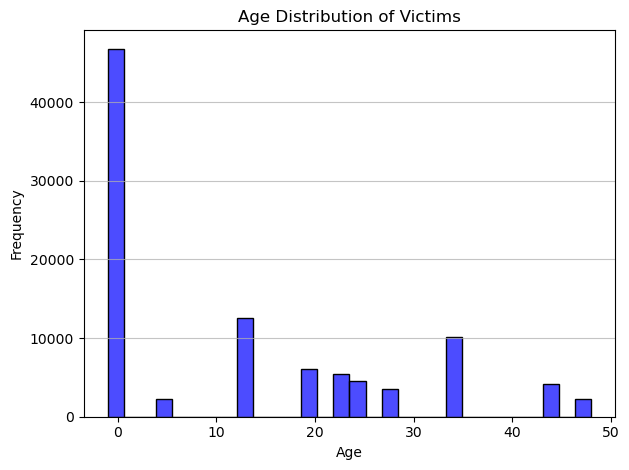

In [70]:
age_range_mapping = {
    '0-8': 4,   # Midpoint of 0 and 8
    '9-17': 13,  # Midpoint of 9 and 17
    '18-20': 19,  # Midpoint of 18 and 20
    '21-23': 22,  # Midpoint of 21 and 23
    '24-26': 25,  # Midpoint of 24 and 26
    '27-29': 28,  # Midpoint of 27 and 29
    '30-38': 34,  # Midpoint of 30 and 38
    '39-47': 44,  # Midpoint of 39 and 47
    '48+': 48      # Midpoint of 48+
}

# Step 1: Clean up the 'ageBroad' column (replace '--' with '-')
df['ageBroad'] = df['ageBroad'].str.replace('--', '-', regex=False)

# Step 2: Map the 'ageBroad' values to their corresponding midpoints
df['ageBroadAvg'] = df['ageBroad'].replace(age_range_mapping)

# Step 3: Ensure that all values in 'ageBroadAvg' are numeric
# Convert the 'ageBroadAvg' column to numeric, coercing errors to NaN (in case there are unexpected values)
df['ageBroadAvg'] = pd.to_numeric(df['ageBroadAvg'], errors='coerce')

# Step 4: Handle NaN values that could not be mapped correctly
# Option 1: Fill NaN values with a default value (e.g., -1) or any suitable default
df['ageBroadAvg'].fillna(-1, inplace=True)

# Option 2: Alternatively, drop rows with NaN values (if you prefer to remove them)
# df.dropna(subset=['ageBroadAvg'], inplace=True)

# Step 5: Plot the histogram of the average age values
sns.histplot(df['ageBroadAvg'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Victims')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show the plot
plt.show()

In [77]:
print(df.columns.tolist())


['By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use', 'yearOfRegistration', 'Datasource', 'gender', 'ageBroad', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'meansOfControlDebtBondage', 'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess', 'meansOfControlThreats', 'meansOfControlPsychologicalAbuse', 'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse', 'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances', 'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare', 'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren', 'meansOfControlThreatOfLawEnforcement', 'meansOfControlWithholdsNecessities', 'meansOfControlWithholdsDocuments', 'meansOfControlOther', 'meansOfControlNotSpecified', 'meansOfControlConcatenated', 'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour', 'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval', '

In [82]:
columns_to_keep = ['yearOfRegistration', 'gender', 'means_of_control', 'ageBroadAvg', 'exploitation_type', 'citizenship', 'majorityStatus', 'isAbduction',  'majorityStatusAtExploit', 'CountryOfExploitation']



existing_columns = [col for col in columns_to_keep if col in df.columns]
df_clean = df[existing_columns]


df_clean.head()



,yearOfRegistration,gender,means_of_control,ageBroadAvg,exploitation_type,citizenship,majorityStatus,isAbduction,majorityStatusAtExploit,CountryOfExploitation
0,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN
1,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN
2,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN
3,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN
4,2002.0,Female,Other Control,19.0,Sexual Exploitation,CO,Adult,0.0,NaN,NaN


In [51]:
df

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97745,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0
97746,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0
97747,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0
97748,NaN,NaN,Case Management,Male,9--17,Minor,NaN,NaN,CM,NaN,...,NaN,NaN,NaN,NaN,LY,0.0,0.0,0.0,0.0,1.0


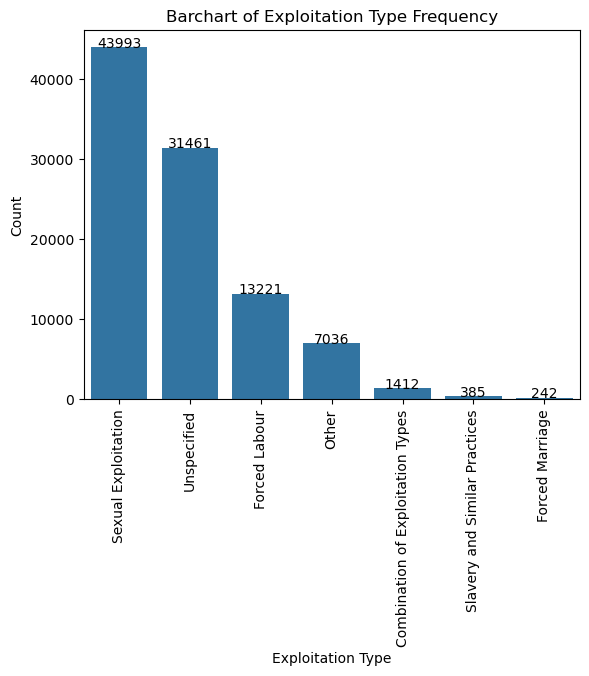

In [4]:
#counts of each exploitation type

counts = df['exploitation_type'].value_counts()

fig1 = sns.countplot(x = 'exploitation_type', data = df)
for i, value in enumerate(counts.values): 
    plt.text(i, value+1, f'{value}', ha = 'center')
plt.xlabel('Exploitation Type')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Barchart of Exploitation Type Frequency')

plt.savefig('bar_chart_.png', format='png')
plt.show()

In [5]:
proportion_table = pd.crosstab(df['exploitation_type'], df['gender'], normalize = "index")
proportion_table

gender,Female,Male,Transgender/NonConforming
exploitation_type,,,
Combination of Exploitation Types,0.973743,0.026257,0.000000
Forced Labour,0.423204,0.576796,0.000000
Forced Marriage,1.000000,0.000000,0.000000
Other,0.687180,0.312820,0.000000
Sexual Exploitation,0.955554,0.042899,0.001547
Slavery and Similar Practices,0.797403,0.202597,0.000000
Unspecified,0.602732,0.397268,0.000000


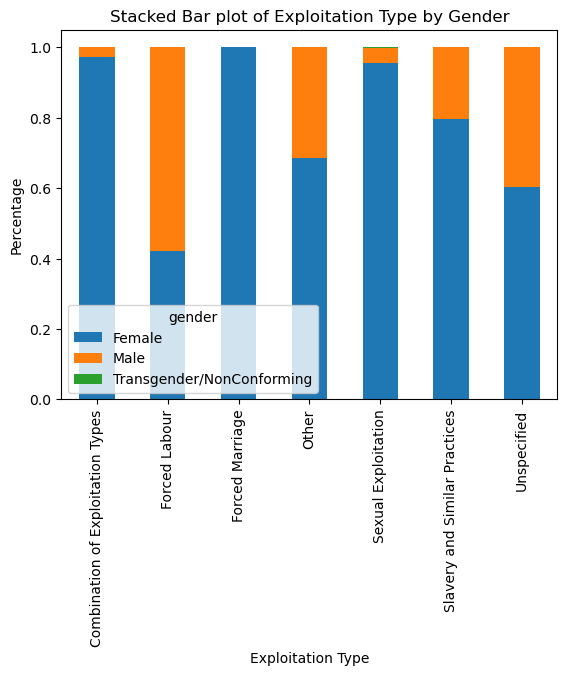

In [6]:
proportion_table.plot(kind = 'bar', stacked = True)
plt.xlabel('Exploitation Type')
plt.ylabel('Percentage')
plt.title('Stacked Bar plot of Exploitation Type by Gender')
plt.show()



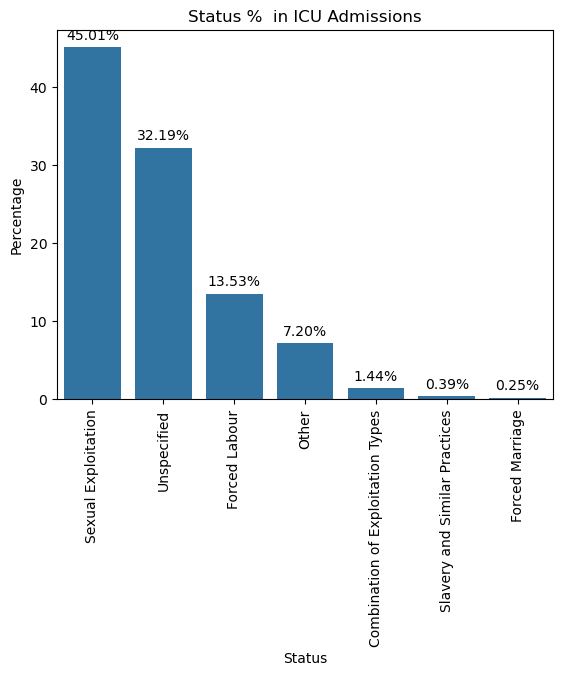

In [7]:
control_counts = df['exploitation_type'].value_counts(normalize = True)*100
control_counts

sns.barplot(x=control_counts.index, y = control_counts.values)
for i, value in enumerate(control_counts.values): 
        plt.text(i, value+1, f'{value:.2f}%', ha = 'center')
    
plt.xlabel('Status')
plt.xticks(rotation = 90)
plt.ylabel('Percentage')
plt.title('Status %  in ICU Admissions')
plt.show()

In [38]:
group_counts = df['means_of_control'].value_counts()

# Display the counts
print(sum(group_counts))

97750


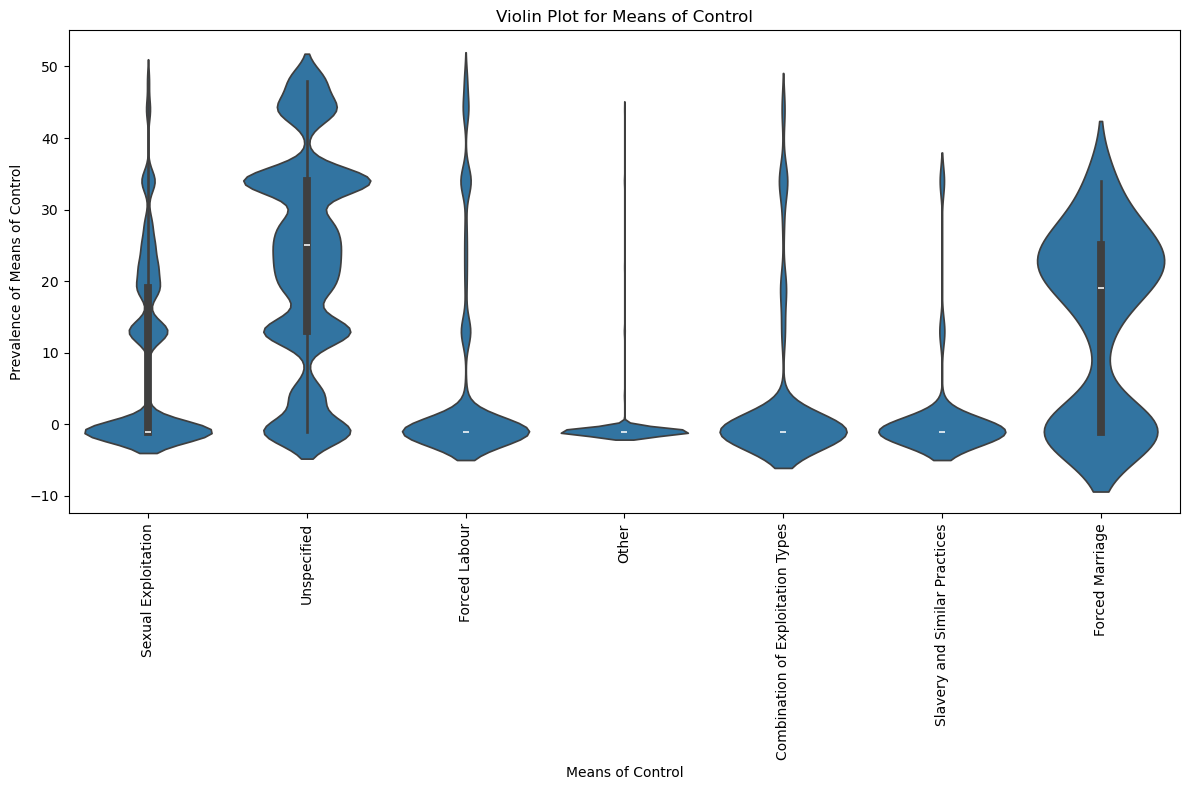

In [26]:


# create the violin plot with boxplots
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, y='ageBroadAvg', x='exploitation_type', scale='width', inner="box")

# customize the plot
plt.title('Violin Plot for Means of Control')
plt.ylabel('Prevalence of Means of Control')
plt.xlabel('Means of Control')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


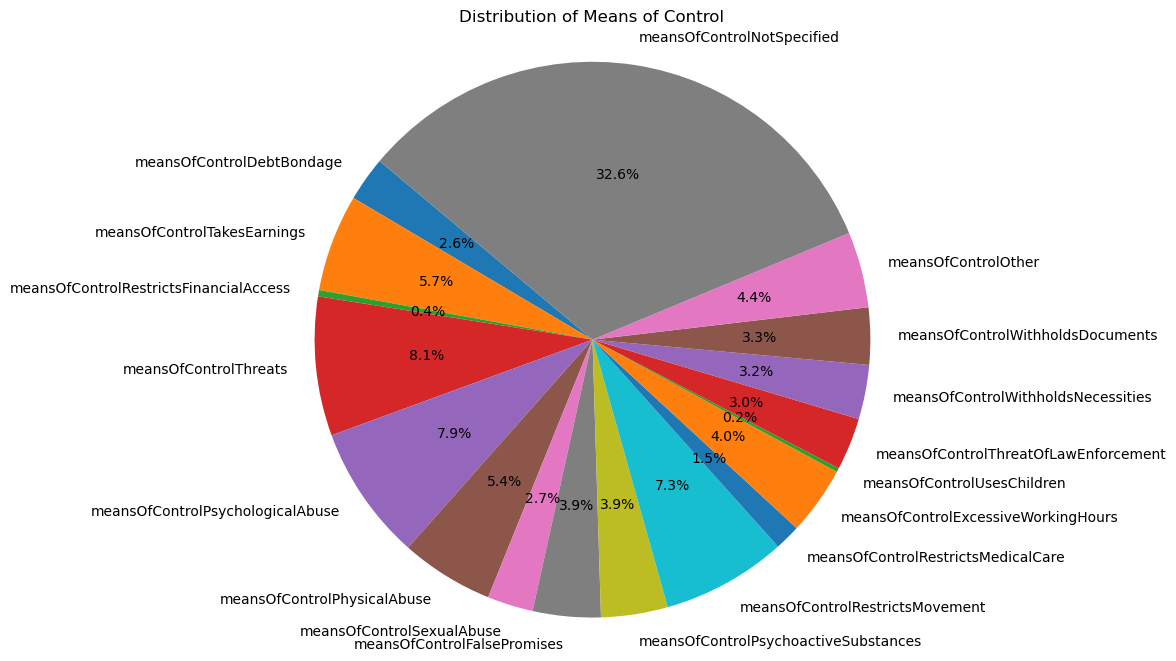

In [23]:
data = {
    'meansOfControlDebtBondage': df['meansOfControlDebtBondage'],
    'meansOfControlTakesEarnings': df['meansOfControlTakesEarnings'],
    'meansOfControlRestrictsFinancialAccess': df['meansOfControlRestrictsFinancialAccess'],
    'meansOfControlThreats': df['meansOfControlThreats'],
    'meansOfControlPsychologicalAbuse': df['meansOfControlPsychologicalAbuse'],
    'meansOfControlPhysicalAbuse': df['meansOfControlPhysicalAbuse'],
    'meansOfControlSexualAbuse': df['meansOfControlSexualAbuse'],
    'meansOfControlFalsePromises': df['meansOfControlFalsePromises'],
    'meansOfControlPsychoactiveSubstances': df['meansOfControlPsychoactiveSubstances'],
    'meansOfControlRestrictsMovement': df['meansOfControlRestrictsMovement'],
    'meansOfControlRestrictsMedicalCare': df['meansOfControlRestrictsMedicalCare'],
    'meansOfControlExcessiveWorkingHours': df['meansOfControlExcessiveWorkingHours'],
    'meansOfControlUsesChildren': df['meansOfControlUsesChildren'],
    'meansOfControlThreatOfLawEnforcement': df['meansOfControlThreatOfLawEnforcement'],
    'meansOfControlWithholdsNecessities': df['meansOfControlWithholdsNecessities'],
    'meansOfControlWithholdsDocuments': df['meansOfControlWithholdsDocuments'],
    'meansOfControlOther': df['meansOfControlOther'],
    'meansOfControlNotSpecified': df['meansOfControlNotSpecified']
}



df_pie = pd.DataFrame(data)

# Calculate total for each means of control
totals = df_pie.sum()


# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Means of Control')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()